In [2]:
%pylab inline
dat1 = np.load('/home/philcox/Save/IllustrisOverall/Hogg_element_predictions_Nomoto2013_net.npz')
dat2 = np.load('/home/philcox/Save/IllustrisOverall/Hogg_element_predictions_chieffi04_net.npz')
dat3 = np.load('/home/philcox/Save/IllustrisOverall/Hogg_normalised_element_predictions_NuGrid_net_delay.npz')
dat4 = np.load('/home/philcox/Save/IllustrisOverall/Hogg_normalised_element_predictions_NuGrid_net_rapid.npz')
dat5 = np.load('/home/philcox/Save/IllustrisOverall/Hogg_normalised_element_predictions_West17_net.npz')

name_list = ['C04','N13','W17','R17d','R17r']
shape_list = ['o','s','*','^','v']
color_list = ['r','b','m','k','c']

data_list = [dat2,dat1,dat5,dat3,dat4]#[dat,dat,dat1]
means = [dat['mean'] for dat in data_list]
sigmas = [dat['sigma'] for dat in data_list]
elements = dat1['elements']
scores = [dat['scores'] for dat in [dat1,dat2]]
norm_scores = [dat['normalised_scores'] for dat in [dat5,dat3,dat4]]

dat1.close()
dat2.close()
dat3.close()
dat4.close()
dat5.close()

Populating the interactive namespace from numpy and matplotlib


In [3]:
#  Reorder
alpha_names = ['He','C','N','O','Ne','Mg','Si','Fe']

alphamean,alphasigma = [],[]
for i in range(len(data_list)):
    meanmean = np.mean(means[i],axis=0)
    meansigma = np.mean(sigmas[i],axis=0)
    re_mean,re_sig = [],[]
    for j in range(len(alpha_names)):
        for k in range(len(elements)):
            if alpha_names[j] == elements[k]:
                re_mean.append(meanmean[k])
                re_sig.append(meansigma[k])
    alphamean.append(re_mean)
    alphasigma.append(re_sig)

In [4]:
# Load in proto-solar data
ps_dat = np.load('Chempy/input/stars/Proto-sun_all.npy')
ps_nam = ps_dat.dtype.names
ps_abun = []; ps_err = []
for el in alpha_names:
    for i in range(len(ps_nam)):
        if ps_nam[i] == el:
            ps_abun.append(ps_dat[0][i])
            ps_err.append(ps_dat[1][i])

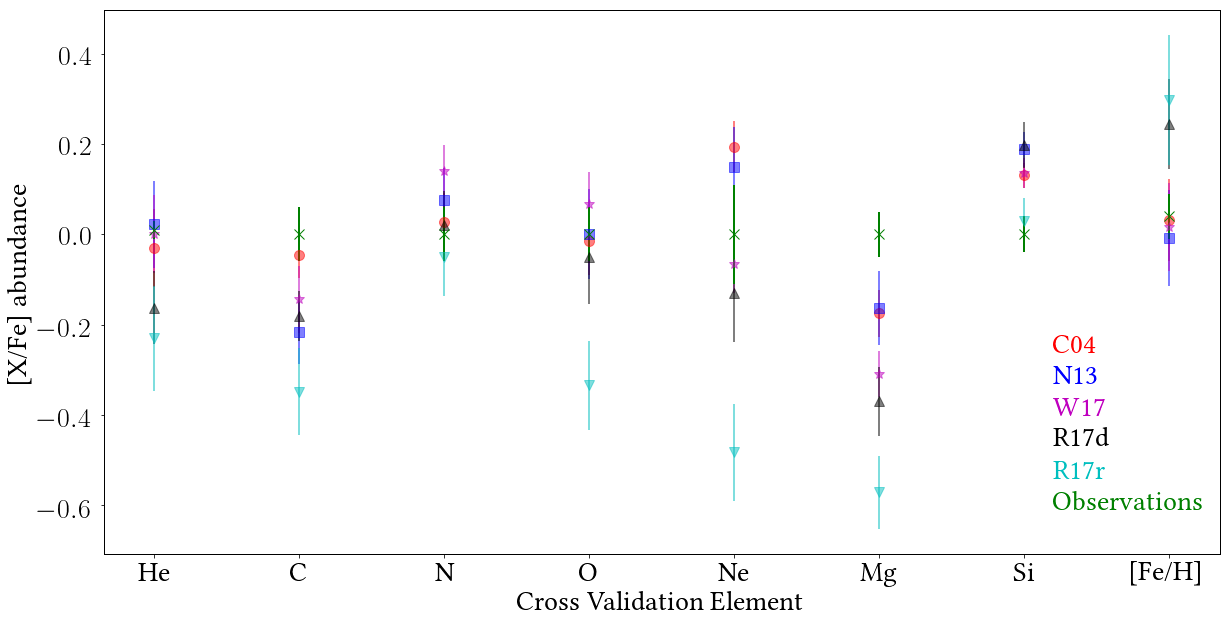

In [5]:
plt.figure(figsize=(20,10))
large_text = 28
text_size = 28
marker_size= 10
small_text = 28
plt.rc('font', family='serif',size = large_text)
plt.rc('xtick', labelsize=small_text)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 2)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
    'font.family' : 'libertine',
    'text.latex.unicode': True,
    }
plt.rcParams.update(params)

# Iterate over trials
for i in range(5):
    plt.errorbar(np.arange(len(alpha_names)),alphamean[i],alphasigma[i],fmt=shape_list[i],ms=marker_size,c=color_list[i],alpha=0.5,label=name_list[i])
    plt.text(6.2,-0.26-0.07*i,name_list[i],color=color_list[i])
plt.errorbar(np.arange(len(alpha_names)),ps_abun,yerr=ps_err,fmt='x',ms=marker_size,c='g',label='Observations')
plt.text(6.2,-0.26-0.07*5,'Observations',color='g')
plt.ylabel('[X/Fe] abundance')
plt.xlabel('Cross Validation Element')
#plt.legend(loc='upper right',)
ax=plt.gca()
elements = elements.astype("<U6")
for e,el in enumerate(alpha_names):
    if el == 'Fe':
        alpha_names[e] = '[Fe/H]'
la=plt.setp(ax,xticks=np.arange(len(alpha_names)), xticklabels=alpha_names)
plt.savefig('PaperPlots/Illustris_element_prediction.pdf',dpi=300,bbox_inches='tight')

In [9]:
from Chempy.parameter import ModelParameters
a = ModelParameters()

# Table of scores
n_el = 8#len(a.initial_neural_names)
print('Yield Set \t Rescaled LOO-CV Score')
print('---------------------------------')
for i in range(2):
    print('%s: \t\t %.2f + %.2f - %.2f' %(name_list[i],np.median(scores[i]/n_el),
                                     np.percentile(scores[i]/n_el,100-15.865)-np.median(scores[i]/n_el),
                                     np.median(scores[i]/n_el)-np.percentile(scores[i]/n_el,15.865)))
for j in range(3):
    print('%s: \t\t %.2f + %.2f - %.2f' %(name_list[j+2],np.median(norm_scores[j]), np.percentile(norm_scores[j],100-15.865)-np.median(norm_scores[j]),
                                     np.median(norm_scores[j])-np.percentile(norm_scores[j],15.865)))

Yield Set 	 Rescaled LOO-CV Score
---------------------------------
C04: 		 0.02 + 0.02 - 0.03
N13: 		 0.23 + 0.01 - 0.01
W17: 		 -0.18 + 0.03 - 0.03
R17d: 		 -0.41 + 0.03 - 0.03
R17r: 		 -1.25 + 0.09 - 0.07


# BAYES SCORES 

In [7]:
# Load datasets
bdat1 = np.load('/home/philcox/Save/IllustrisOverall/Bayes_score - Nomoto2013_net, Karakas_net_yield, Seitenzahl.npz')
bdat2 = np.load('/home/philcox/Save/IllustrisOverall/Bayes_score - chieffi04_net, Karakas_net_yield, Seitenzahl.npz')
bdat3 = np.load('/home/philcox/Save/IllustrisOverall/Bayes_score - NuGrid_net_delay, Karakas_net_yield, Seitenzahl.npz')
bdat4 = np.load('/home/philcox/Save/IllustrisOverall/Bayes_score - NuGrid_net_rapid, Karakas_net_yield, Seitenzahl.npz')
bdat5 = np.load('/home/philcox/Save/IllustrisOverall/Bayes_score - West17_net, Karakas_net_yield, Seitenzahl.npz')

bdat_list = [bdat2,bdat1,bdat5,bdat3,bdat4]
bnames = ['C04','N13','W17','R17d','R17r']

bscores = [bdat['score'] for bdat in bdat_list]
bscores_err = [bdat['score_err'] for bdat in bdat_list]

bdat1.close()
bdat2.close()
bdat3.close()
bdat4.close()
bdat5.close()

In [8]:
# Table of scores
print('Yield Set \t Bayes Score')
print('----------------------------------')
for i in range(len(data_list)):
    print('%s: \t\t %.4f +/- %.4f' %(bnames[i],np.log10(bscores[i]),bscores_err[i]/(bscores[i]*np.log(10))))

Yield Set 	 Bayes Score
----------------------------------
C04: 		 1.6105 +/- 0.0021
N13: 		 0.6475 +/- 0.0027
W17: 		 0.7745 +/- 0.0038
R17d: 		 -0.3360 +/- 0.0014
R17r: 		 -2.4428 +/- 0.0012


In [ ]:
from Chempy.yields import SN2_feedback
basic_sn2 = SN2_feedback()
getattr(basic_sn2,'Frischknecht16_net')()

In [ ]:
from Chempy.yields import SN2_feedback
basic2_sn2 = SN2_feedback()
getattr(basic2_sn2,'Nomoto2013_net')()

In [ ]:
from Chempy.yields import SN2_feedback
basic3_sn2 = SN2_feedback()
getattr(basic3_sn2,'chieffi04_net')()

In [ ]:
basic3_sn2.table[1e-3][-1]

In [ ]:
dN=basic2_sn2.table[1e-3][1]
dF=basic_sn2.table[1e-3][0]
dC = basic3_sn2.table[1e-3][1]

small_dat = [[],[],[]]

for j,data in enumerate([dN,dF,dC]):
    for el in a.element_names:
        for i in range(len(data)):
            if data.dtype.names[i] == el:
                small_dat[j].append(data[i])

N = small_dat[0]
F = small_dat[1]
C = small_dat[2]
                
diff = []
print('Property:    N13 \t F16       \t C04')
print('---------------------------------------------------')
for i in range(len(a.element_names)):
    print('%s \t %.3e \t %.3e \t %.3e' %(a.element_names[i],N[i],F[i],C[i]))
#    diff.append(np.log10(dN[i]/dF[i]))
    
#for i in range(len(dN)):
#    print('%s \t %.3e' %(dN.dtype.names[i],diff[i]))

In [ ]:
basic2_sn2.masses

In [ ]:
basic_sn2.masses

In [ ]:
basic_sn2.table[1e-3][0]['Fe']

In [ ]:
(-4.003516405e-06-4.066417232e-05+4.503507935e-06+1.855557654e-05)/15

In [ ]:
from Chempy.solar_abundance import solar_abundances
basic_solar = solar_abundances()
getattr(basic_solar,'Asplund09')()

In [ ]:
basic_solar.fractions
basic_solar.all_elements
basic_solar.fractions[25] # Fe

In [ ]:

basic2_sn2.metallicities

In [ ]:
nomdat = np.load('Chempy/input/yields/Nomoto2013/nomoto_net_met_ind_1.npy')

In [ ]:
nomdat[1]['Fe']